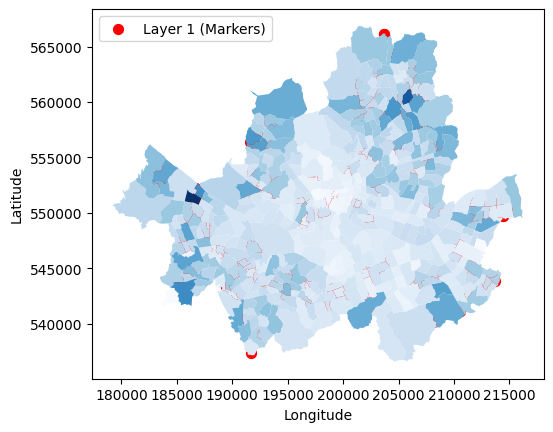

In [1]:

import geopandas as gpd
# Create a GeoDataFrame with facility data
#gdf = gpd.read_file("C:\Success_Project/TL_DSPSN_FCLTY_ST_2019.shp", SHAPE_RESTORE_SHX = 'YES')
#facility_locations = "C:/Users\LG_GRAM\Desktop\B402/TL_DSPSN_FCLTY_ST_2019.shp"
#print(gpd.read_file(facility_locations))
import matplotlib.pyplot as plt
#print(facility_locations)

# Create a density map (KDE) using GeoPandas and Matplotlib
#gdf = gpd.GeoDataFrame(facility_locations[6], geometry=gpd.points_from_xy(float(facility_locations[6]), float(facility_locations[7])), crs="EPSG:5186")
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#ax = world.plot(figsize=(12, 8))
#gdf.plot(ax=ax, color='red', markersize=5)
#plt.show()
import geopandas as gpd

# Specify the path to your shapefile
shapefile_path1 = "C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B402. 서울시 장애인시설 공간데이터/2. 파일데이터/2019/TL_DSPSN_FCLTY_ST_2019.shp"
shapefile_path2 = "C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B399. 서울시 행정동단위 장애인 등급별 현황 공간데이터/2. 파일데이터/2019/TL_DSPSN_DEG_ST_2020.shp"

# Read the shapefile into a GeoDataFrame
gdf1 = gpd.read_file(shapefile_path1)
gdf2 = gpd.read_file(shapefile_path2)
#print(gdf1.size())
# Display the first few rows
#print(gdf1.head())
#print(gdf2.head())
ax = gdf1.plot(marker='o', color='red', markersize=50)  # Customize marker style
gdf2.plot(ax = ax, column = "D_ALL", cmap = "Blues")  # Customize color
plt.legend(['Layer 1 (Markers)', 'Layer 2 (Colors)'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()












In [20]:
from pulp import LpProblem, LpVariable, LpMaximize, lpSum
import geopandas as gpd
from pulp import LpProblem, LpVariable, LpMaximize, lpSum
import matplotlib.pyplot as plt


In [6]:

# Load shapefiles
bus_stops = gpd.read_file("C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B405. 서울시 버스정류장 공간데이터/2. 파일데이터/2019/TB_E_BUSSTOP_2019.shp")
subway_stations = gpd.read_file("C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B404. 수도권 지하철 공간데이터/2. 파일데이터/2019/TB_O_SB_STATN_2019.shp")
#print(subway_stations)
#fig, ax1 = plt.subplots(figsize = (20,20))
#ax = subway_stations.plot(marker='o', color='red', markersize=30) 
#subway_stations.plot(ax = ax1, column = "TM_X"and "TM_Y", cmap = "Blues")
#plt.show()
existing_facilities = gpd.read_file("C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B402. 서울시 장애인시설 공간데이터/2. 파일데이터/2019/TL_DSPSN_FCLTY_ST_2019.shp")
disabled_population_areas = gpd.read_file("C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B399. 서울시 행정동단위 장애인 등급별 현황 공간데이터/2. 파일데이터/2019/TL_DSPSN_DEG_ST_2020.shp")

# Extract coordinates or spatial geometries
bus_stops_coords = [(point.x, point.y) for point in bus_stops.geometry]
subway_stations_coords = [(point.x, point.y) for point in subway_stations.geometry]
existing_facilities_coords = [(point.x, point.y) for point in existing_facilities.geometry]
print(subway_stations_coords)
print(subway_stations.head)

[(202653.11199999973, 557083.2119999994), (202211.99920000043, 555986.0727999993), (201448.47559999954, 554789.2391999997), (200549.37930000015, 554326.8013000004), (200162.85780000035, 553647.3849999998), (200860.78149999958, 552436.0074000005), (200697.51680000033, 551738.8379999995), (199494.68030000012, 551306.5712000001), (198791.91089999955, 551278.4558000006), (198078.12509999983, 551003.9240000006), (197575.57710000034, 550575.0214000009), (197535.22219999973, 549455.5063000005), (197623.6275000004, 548369.8030999992), (197162.45710000023, 547747.7065999992), (197732.39070000034, 546982.0215000007), (198170.4154000003, 544839.9772999994), (198407.26829999965, 542985.7572000008), (198380.1752000004, 541905.6446000002), (199038.8214999996, 540500.9370000008), (197463.8822999997, 549062.7838000003), (196867.9134999998, 547823.1648999993), (194913.04330000002, 546089.5822000001), (193492.23280000035, 545993.2470999993), (191834.63069999963, 546234.6383999996), (190389.97970000003, 

In [21]:

# Create a PuLP problem
mclp_problem = LpProblem("Maximal_Covering_Location_Problem", LpMaximize)

# Decision variables
bus_stops_vars = LpVariable.dicts("BusStop", range(len(bus_stops_coords)), cat="Binary")
subway_stations_vars = LpVariable.dicts("SubwayStation", range(len(subway_stations_coords)), cat="Binary")
existing_facilities_vars = LpVariable.dicts("ExistingFacility", range(len(existing_facilities_coords)), cat="Binary")

#done


In [18]:
#IMPORTANT
from shapely.geometry import Point

def is_covered(facility_coords, demand_point_coords, coverage_radius):
    """
    Check if a facility (specified by its coordinates) covers a demand point
    within a certain coverage radius.

    Args:
    facility_coords (tuple): Coordinates of the facility (e.g., (latitude, longitude)).
    demand_point_coords (tuple): Coordinates of the demand point (e.g., (latitude, longitude)).
    coverage_radius (float): Maximum coverage radius in the same units as the coordinates.

    Returns:
    bool: True if the facility covers the demand point, False otherwise.
    """
    facility_point = Point(facility_coords)
    demand_point = Point(demand_point_coords)

    # Calculate the distance between the facility and demand point
    distance = facility_point.distance(demand_point)

    return distance <= coverage_radius



In [19]:

import geopandas as gpd
from pulp import LpProblem, LpVariable, LpMaximize, lpSum

bus_stops = gpd.read_file("C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B405. 서울시 버스정류장 공간데이터/2. 파일데이터/2019/TB_E_BUSSTOP_2019.shp")
subway_stations = gpd.read_file("C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B404. 수도권 지하철 공간데이터/2. 파일데이터/2019/TB_O_SB_STATN_2019.shp")
#print(subway_stations)
#fig, ax1 = plt.subplots(figsize = (20,20))
#ax = subway_stations.plot(marker='o', color='red', markersize=30) 
#subway_stations.plot(ax = ax1, column = "TM_X"and "TM_Y", cmap = "Blues")
#plt.show()
existing_facilities = gpd.read_file("C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B402. 서울시 장애인시설 공간데이터/2. 파일데이터/2019/TL_DSPSN_FCLTY_ST_2019.shp")
disabled_population_areas = gpd.read_file("C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B399. 서울시 행정동단위 장애인 등급별 현황 공간데이터/2. 파일데이터/2019/TL_DSPSN_DEG_ST_2020.shp")

# Extract coordinates or spatial geometries
bus_stops_coords = [(point.x, point.y) for point in bus_stops.geometry]
subway_stations_coords = [(point.x, point.y) for point in subway_stations.geometry]
existing_facilities_coords = [(point.x, point.y) for point in existing_facilities.geometry]
print(subway_stations_coords)

# Create a PuLP problem
mclp_problem = LpProblem("Maximal_Covering_Location_Problem", LpMaximize)

# Decision variables
bus_stops_vars = LpVariable.dicts("BusStop", range(len(bus_stops_coords)), cat="Binary")
subway_stations_vars = LpVariable.dicts("SubwayStation", range(len(subway_stations_coords)), cat="Binary")
existing_facilities_vars = LpVariable.dicts("ExistingFacility", range(len(existing_facilities_coords)), cat="Binary")

# Define coverage constraints
# Define coverage constraints
#여기서부터 
coverage_constraints = []
for i, demand_point in enumerate(disabled_population_areas.geometry):
    # Check coverage for bus stops
    bus_stop_coverage = lpSum(
        bus_stops_vars[j]
        for j in range(len(bus_stops_coords))
        if is_covered(bus_stops_coords[j], demand_point.coords[0], coverage_radius=0.01)
    )

    # Check coverage for subway stations
    subway_station_coverage = lpSum(
        subway_stations_vars[k]
        for k in range(len(subway_stations_coords))
        if is_covered(subway_stations_coords[k], demand_point.coords[0], coverage_radius=0.01)
    )

    # Check coverage for existing facilities
    existing_facility_coverage = lpSum(
        existing_facilities_vars[l]
        for l in range(len(existing_facilities_coords))
        if is_covered(existing_facilities_coords[l], demand_point.coords[0], coverage_radius=0.01)
    )

    # Add the coverage constraint for this demand point
    coverage_expression = bus_stop_coverage + subway_station_coverage + existing_facility_coverage >= 1
    coverage_constraints.append(coverage_expression)

# Add coverage constraints to the problem
for i, constraint in enumerate(coverage_constraints):
    mclp_problem += constraint, f"Coverage_{i}"


# Objective function: Maximize coverage while minimizing facilities
mclp_problem += lpSum(bus_stops_vars) + lpSum(subway_stations_vars) + lpSum(existing_facilities_vars)

# Solve the MCLP problem
mclp_problem.solve()

# Extract the selected facilities
selected_bus_stops = [i for i, var in bus_stops_vars.items() if var.varValue == 1]
selected_subway_stations = [i for i, var in subway_stations_vars.items() if var.varValue == 1]
selected_existing_facilities = [i for i, var in existing_facilities_vars.items() if var.varValue == 1]

# Display the selected facilities
print("Selected Bus Stops:")
print(selected_bus_stops)
print("Selected Subway Stations:")
print(selected_subway_stations)
print("Selected Existing Facilities:")
print(selected_existing_facilities)


[(202653.11199999973, 557083.2119999994), (202211.99920000043, 555986.0727999993), (201448.47559999954, 554789.2391999997), (200549.37930000015, 554326.8013000004), (200162.85780000035, 553647.3849999998), (200860.78149999958, 552436.0074000005), (200697.51680000033, 551738.8379999995), (199494.68030000012, 551306.5712000001), (198791.91089999955, 551278.4558000006), (198078.12509999983, 551003.9240000006), (197575.57710000034, 550575.0214000009), (197535.22219999973, 549455.5063000005), (197623.6275000004, 548369.8030999992), (197162.45710000023, 547747.7065999992), (197732.39070000034, 546982.0215000007), (198170.4154000003, 544839.9772999994), (198407.26829999965, 542985.7572000008), (198380.1752000004, 541905.6446000002), (199038.8214999996, 540500.9370000008), (197463.8822999997, 549062.7838000003), (196867.9134999998, 547823.1648999993), (194913.04330000002, 546089.5822000001), (193492.23280000035, 545993.2470999993), (191834.63069999963, 546234.6383999996), (190389.97970000003, 

NotImplementedError: Component rings have coordinate sequences, but the polygon does not

KeyError: 'TM_Y'

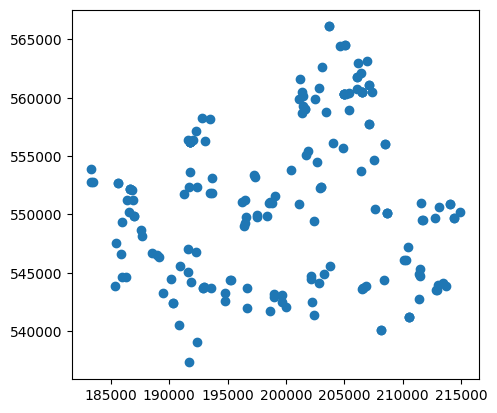

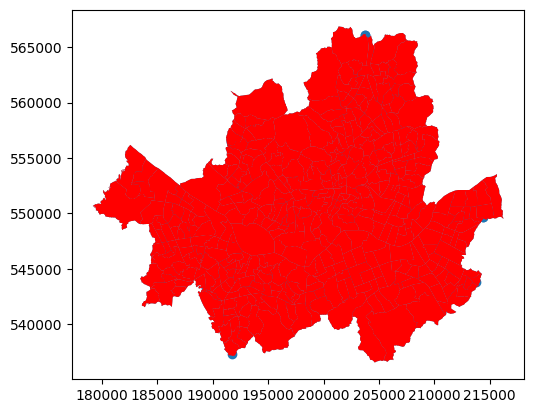

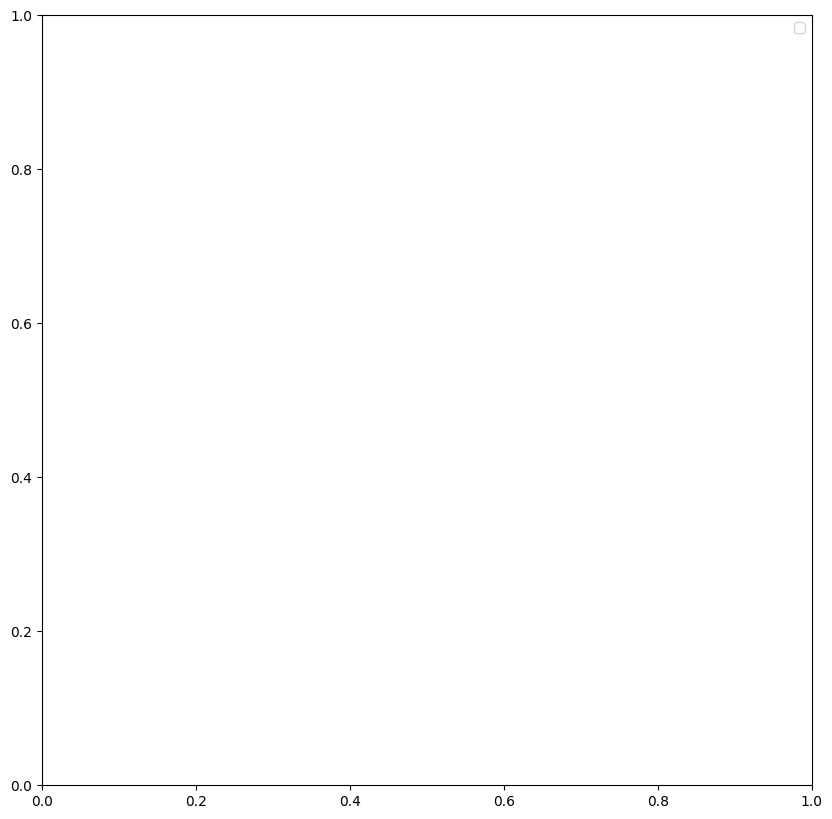

In [15]:
# Plot the shapefile
gdf1.plot()
#gdf = gpd.GeoDataFrame(gdf1, geometry=gpd.points_from_xy(gdf1[5], gdf1[6]), crs="EPSG:5186")
#ax = gdf1.plot(marker='o', color='blue', markersize=5)
#plt.title("Facility Density Map")
#plt.show()
ax = gdf1.plot()
gdf2.plot(ax=ax)
gdf2.plot(ax=ax, color='red', marker='o', markersize=5)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
plt.legend(['Layer 1', 'Layer 2'])
gdf2.plot(ax = ax, column = "TM_X" and "TM_Y", cmap = "Blues")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Plot the shapefile
#gdf1.plot()
#gdf = gpd.GeoDataFrame(gdf1, geometry=gpd.points_from_xy(gdf1[5], gdf1[6]), crs="EPSG:5186")
#ax = gdf1.plot(marker='o', color='blue', markersize=5)
#plt.title("Facility Density Map")
#plt.show()
#ax = gdf1.plot()
#gdf2.plot(ax=ax)
#gdf2.plot(ax=ax, color='red', marker='o', markersize=5)
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize = (10,10))
#plt.legend(['Layer 1', 'Layer 2'])
#gdf2.plot(ax = ax, column = "TM_X"and "TM_Y", cmap = "Blues")
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()

     ID  TGRP_CODE    BD_07_NM                             ADDR_KOR  \
0   2.0        4.0    강남장애인복지관               강남구 개포로 605 (개포동12-10)   
1   9.0        4.0     성모자애복지관            강남구 헌릉로 757길 35 (율현동 100)   
2  10.0        8.0  성모자애제1주간보호           강남구 헌릉로757길 35 (율현동 110번지)   
3  11.0        8.0  성모자애제2주간보호           강남구 헌릉로757길 35 (율현동 110번지)   
4  12.0        8.0    역삼주간보호센터  강남구 테헤란로8길 36 (역삼동 827-61) 강남문화원 2층   

        TEL_NUM                                    HMPG_CN          TM_X  \
0   02-445-8006                        www.activeart.or.kr  206498.21074   
1  02-3411-9581                        www.smwelfare.or.kr  210567.99743   
2  02-3411-9581                 http://www.smwelfare.or.kr  210567.99743   
3  02-3411-9581                 http://www.smwelfare.or.kr  210567.99743   
4   02-518-2270  http://hnwelfare.or.kr/main/sub04_03.html  202821.32529   

           TM_Y                       geometry  
0  543618.73207  POINT (206498.211 543618.732)  
1  541184.60907  P

<Axes: >

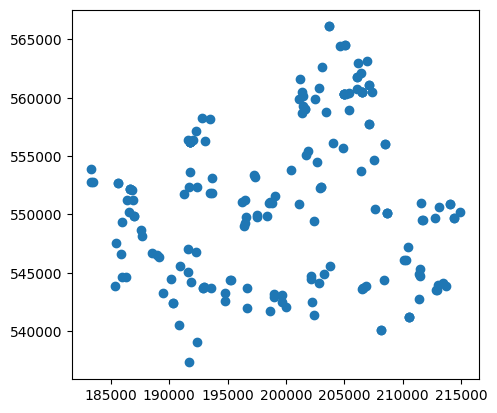

In [17]:
import geopandas as gpd

# Specify the path to your shapefile
shapefile_path = "C:/Users/박랑희/OneDrive - skuniv.ac.kr/바탕 화면/공모전 코드/빅데이터 공모전 압축파일/B402. 서울시 장애인시설 공간데이터/2. 파일데이터/2019/TL_DSPSN_FCLTY_ST_2019.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Display the first few rows
print(gdf.head())

# Plot the shapefile
gdf.plot()
